In [1]:
import requests
import pandas as pd
from IPython.display import Image, display
from ydata_profiling import ProfileReport

In [2]:
nasa = 'ev6dizjUNfOJppybzeSenVn8SpUMqTDiS408y3ef'

In [3]:
APOD = requests.get("https://api.nasa.gov/planetary/apod?api_key=ev6dizjUNfOJppybzeSenVn8SpUMqTDiS408y3ef")
image = APOD.json()

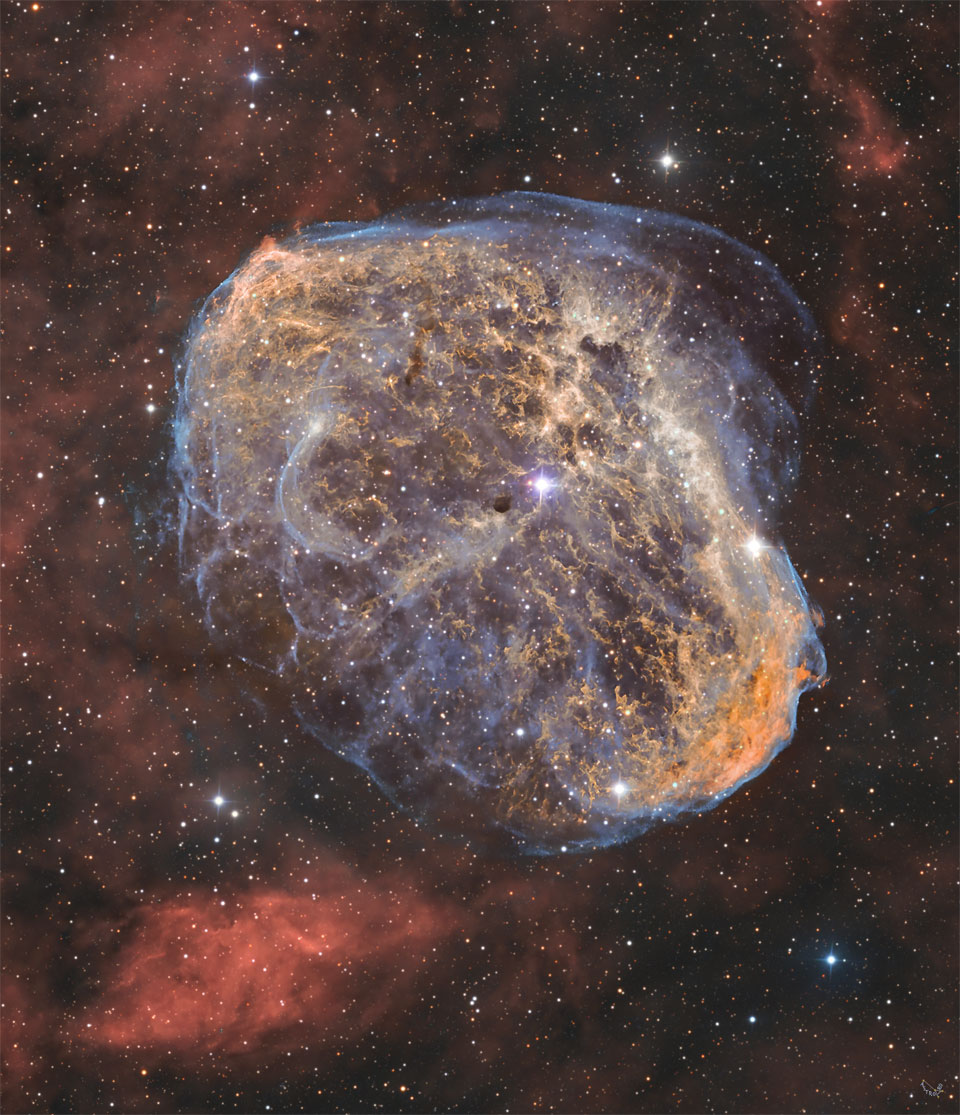

In [4]:
display(Image(image['url']))

In [5]:
Asteroid = requests.get("https://api.nasa.gov/neo/rest/v1/neo/browse?api_key=ev6dizjUNfOJppybzeSenVn8SpUMqTDiS408y3ef")

In [6]:
response = Asteroid.json()

In [7]:
 # Extract relevant information
asteroids = []
for neo in response['near_earth_objects']:
    asteroid = {
        'Asteroid ID': neo['id'],
        'Asteroid name': neo['name'],
        'Minimal estimated diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
        'Absolute_magnitude': neo['absolute_magnitude_h'],
        'Relative_velocity': float(neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second']) if neo['close_approach_data'] else None
     }
    asteroids.append(asteroid)

In [8]:
#creating a pandas dataframe
df = pd.DataFrame(asteroids)

## EDA

In [9]:
df.head()

,Asteroid ID,Asteroid name,Minimal estimated diameter,Absolute_magnitude,Relative_velocity
0,2000433,433 Eros (A898 PA),22.006703,10.41,5.578619
1,2000719,719 Albert (A911 TB),2.025606,15.59,3.446029
2,2000887,887 Alinda (A918 AA),4.534767,13.84,6.804792
3,2001036,1036 Ganymed (A924 UB),38.419789,9.20,6.303866
4,2001221,1221 Amor (1932 EA1),0.888290,17.38,13.269376


In [10]:
df.shape

(20, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Asteroid ID                 20 non-null     object 
 1   Asteroid name               20 non-null     object 
 2   Minimal estimated diameter  20 non-null     float64
 3   Absolute_magnitude          20 non-null     float64
 4   Relative_velocity           20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 932.0+ bytes


In [12]:
df.isnull().sum()

Asteroid ID                   0
Asteroid name                 0
Minimal estimated diameter    0
Absolute_magnitude            0
Relative_velocity             0
dtype: int64

In [13]:
# generating pandas profiling report
profile = ProfileReport(df, title = "Near Earth Objects Report")
profile.to_file("near earth object.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
 # Export to CSV
df.to_csv('nasa_asteroids.csv', index=False)